In [63]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [64]:
import tensorflow as tf
from tensorflow import keras

In [65]:
train_dir=r'C:\Users\hp\Downloads\archive\chest_xray\train'
valid_dir=r'C:\Users\hp\Downloads\archive\chest_xray\val'
test_dir=r'C:\Users\hp\Downloads\archive\chest_xray\test'

In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                height_shift_range=0.2,
                                width_shift_range=0.2,
                                rotation_range=40,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
train_dir,
batch_size=20,
target_size=(150,150),
class_mode='binary')

validation_generator=test_datagen.flow_from_directory(
valid_dir,
batch_size=20,
target_size=(150,150),
class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 1066 images belonging to 2 classes.


In [67]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [68]:
np.random.seed(42)
tf.random.set_seed(42)

In [69]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(256,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [70]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(2e-5),
             metrics=['acc'])

In [71]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 128)     

In [72]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("CNN4-{epoch:02d}.h5")

In [79]:
model_history=model.fit(
train_generator,
steps_per_epoch=20,
epochs=20,
validation_data=validation_generator,
validation_steps=20)

Epoch 1/20
20/20 [==============================] - 11s 566ms/step - loss: 0.3551 - acc: 0.8325 - val_loss: 0.3229 - val_acc: 0.8725
Epoch 2/20
20/20 [==============================] - 12s 590ms/step - loss: 0.3609 - acc: 0.8325 - val_loss: 0.3194 - val_acc: 0.8775
Epoch 3/20
20/20 [==============================] - 12s 597ms/step - loss: 0.3450 - acc: 0.8450 - val_loss: 0.3246 - val_acc: 0.8725
Epoch 4/20
20/20 [==============================] - 12s 607ms/step - loss: 0.3547 - acc: 0.8475 - val_loss: 0.3171 - val_acc: 0.8825
Epoch 5/20
20/20 [==============================] - 13s 658ms/step - loss: 0.3474 - acc: 0.8400 - val_loss: 0.3013 - val_acc: 0.8925
Epoch 6/20
20/20 [==============================] - 13s 673ms/step - loss: 0.3500 - acc: 0.8500 - val_loss: 0.3089 - val_acc: 0.8750
Epoch 7/20
20/20 [==============================] - 13s 672ms/step - loss: 0.3484 - acc: 0.8550 - val_loss: 0.2975 - val_acc: 0.8975
Epoch 8/20
20/20 [==============================] - 13s 661ms/step - 

In [74]:
model_history.history

{'loss': [0.5905733108520508,
  0.5804637670516968,
  0.5494528412818909,
  0.5645409822463989,
  0.5352339148521423,
  0.5142306089401245,
  0.47850972414016724,
  0.4740697741508484,
  0.45400965213775635,
  0.44747576117515564,
  0.4378783702850342,
  0.4233923554420471,
  0.4084469676017761,
  0.3969781696796417,
  0.42538508772850037,
  0.39257505536079407,
  0.4034402370452881,
  0.3552638292312622,
  0.3746567368507385,
  0.3615427613258362],
 'acc': [0.7379999756813049,
  0.7400000095367432,
  0.7570000290870667,
  0.7300000190734863,
  0.7419999837875366,
  0.7559999823570251,
  0.7699999809265137,
  0.7630000114440918,
  0.7829999923706055,
  0.7881526350975037,
  0.7929999828338623,
  0.781124472618103,
  0.8182730674743652,
  0.8090000152587891,
  0.8019999861717224,
  0.8109999895095825,
  0.8080000281333923,
  0.843999981880188,
  0.8309999704360962,
  0.8313252925872803],
 'val_loss': [0.7408350110054016,
  0.7039255499839783,
  0.7312376499176025,
  0.6420139074325562,


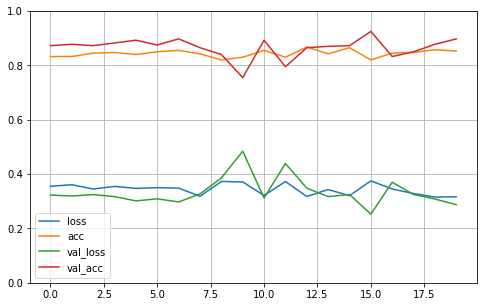

In [80]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)  #To set y-axis between 0 and 1
plt.show()

In [81]:
model.save('CNN1.h5')

In [82]:
test_generator=test_datagen.flow_from_directory(
test_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

Found 624 images belonging to 2 classes.


In [83]:
model.evaluate(test_generator,steps=50)

50/50 [==============================] - 5s 95ms/step - loss: 0.3944 - acc: 0.8381


[0.3944360613822937, 0.8381410241127014]